In [2]:
import csv
import numpy as np
import scipy
import networkx as nx
import math
import sys
import os
import subprocess
import scipy.stats
import scipy.optimize
import operator
import time
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from scipy.sparse import csr_matrix

sys.path.append("../Python_code") # go to parent dir
from canvas_vis import * 
from analytics_combined import *
from generate_proj_to_remove import *
from project_data_analysis import *
from user_embedding import *
from segmentation import *
from evaluation import *
import pickle

In [3]:
#Reading ground truth data

t = time.time()

projects_to_remove = get_list_of_removed_proj(output_filename = "../data/proj_to_remove.txt")

input_file= "../data/sorted_tile_placements_proj.csv"
js_filename = "../data/atlas_complete.json"

names, descriptions = read_picture_names_and_descriptions(js_filename)

print("time = ", time.time()-t, " seconds")

time =  417.94053983688354  seconds


In [20]:
#Parameters

#Area of the canvas considered (0-1002,0-1002 is the full canvas)
min_x = 0
max_x = 1002
#max_x = 100
min_y = 0
#max_y = 100
max_y = 1002

#distance threshold in update graphs
#updates within dist_threshold positions from each other
#that co-exist at any point in time will be connected
dist_threshold = 1

In [21]:
G_ups, ups = create_graph(input_file, projects_to_remove, dist_threshold, min_x, max_x, min_y, max_y)

In [85]:
pfile = open('sign_emb.pkl', 'rb')
user_index_sign, emb_sign = pickle.load(pfile)
pfile.close()

In [5]:
pfile = open('act_emb.pkl', 'rb')
user_index_sign, emb_sign = pickle.load(pfile)
pfile.close()

In [189]:
pfile = open('icwsm_emb_small.pkl', 'rb')
user_index_sign, emb_sign = pickle.load(pfile)
pfile.close()

In [146]:
users_final = []
users_dict = {}
j = 0
for i in range(len(ups)):
    up = ups[i]
    if up[6] == 1 and up[1] not in users_dict and up[1] in user_index_sign:
        users_final.append(up[1])
        users_dict[up[1]] = j
        j = j + 1

In [190]:
emb_sign_final = emb_sign

In [33]:
len(users_final)

5648

In [177]:
emb_sign_final = np.zeros((len(users_final), emb_sign.shape[1]))
#emb_sign_final = np.zeros((1000, emb_sign.shape[1]))

In [178]:
for u in range(len(users_final)):
    emb_sign_final[u] = emb_sign[user_index_sign[users_final[u]]]

In [187]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=.01, min_samples=5).fit(emb_sign_final)
max(clustering.labels_)

-1

In [119]:
np.count_nonzero(clustering.labels_ == 0) / emb_sign_final.shape[0]

0.9298349056603774

In [74]:
labels = clustering.labels_
unique_labels = set(labels)

colors = [plt.cm.Spectral(each)
    for each in np.linspace(0, 1, len(unique_labels))]

data = np.ones((max_y-min_y+1, max_x-min_x+1, 3))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0]
    
    for i in range(len(ups)):
        up = ups[i]
        if up[6] == 1 and up[1] in users_dict and labels[users_dict[up[1]]] == k:
            x = up[2]
            y = up[3]
            
            data[x][y][0] = col[0]
            data[x][y][1] = col[1]
            data[x][y][2] = col[2]

KeyboardInterrupt: 

In [195]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, init='random', perplexity=.1).fit_transform(emb_sign_final)

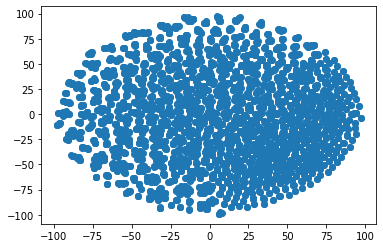

In [196]:
plt.scatter(X_embedded[:,0], X_embedded[:,1])

In [188]:
emb_sign_final

array([[ 0.23502332,  0.12441259, -0.11176388, ..., -0.08948225,
         0.01555585,  0.02529351],
       [-0.02983661, -0.04770632, -0.02821928, ...,  0.01644706,
        -0.02443413, -0.1136112 ],
       [ 0.15101798,  0.03352037,  0.03037865, ..., -0.03051061,
        -0.38715944,  0.05607028],
       ...,
       [ 0.0965751 ,  0.13023673,  0.12474819, ..., -0.17502466,
         0.15740211, -0.15307279],
       [-0.32708868,  0.19152211, -0.2388716 , ..., -0.19280601,
        -0.00727559, -0.02305266],
       [-0.21020488,  0.0894736 ,  0.15923427, ..., -0.02710523,
        -0.01044516, -0.16825353]])

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

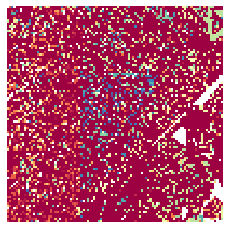

In [59]:
draw_canvas(data, "regions_sign_emb.svg")

In [80]:
data

array([[[0.        , 0.        , 0.        ],
        [0.61960784, 0.00392157, 0.25882353],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [1.        , 1.        , 1.        ]],

       [[0.        , 0.        , 0.        ],
        [0.61960784, 0.00392157, 0.25882353],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [1.        , 1.        , 1.        ]],

       [[0.61960784, 0.00392157, 0.25882353],
        [0.61960784, 0.00392157, 0.25882353],
        [0.61960784, 0.00392157, 0.25882353],
        ...,
        [0.61960784, 0.00392157, 0.25882353],
        [0.61960784, 0.00392157, 0.25882353],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [134]:
min_y

0

In [70]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(samp_emb, quantile=.1, n_samples=1000)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(samp_emb)

MeanShift(bandwidth=1.0788295500450473, bin_seeding=True, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [60]:
ms.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [107]:
np.linalg.norm(samp_emb[2])

1.0000000074376225

In [76]:
len(user_index_sign)

1166924

In [78]:
len(user_index_sign)

1118382

In [80]:
emb_sign.shape

(1113860, 120)

In [29]:
data = 16 * np.ones((max_y-min_y, max_x-min_x))

for u in range(len(ups)):
    y = ups[u][2]
    x = ups[u][3]
    color = ups[u][4]
    
    data[x][y] = color

In [30]:
data = canvas_color_code_rgb(data)

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

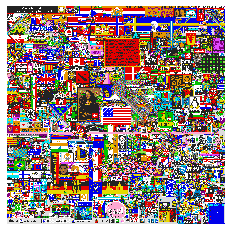

In [31]:
draw_canvas(data, "regions_sign_emb.svg")

In [12]:
data = extract_canvas_color('../data/sorted_tile_placements_proj.csv')

In [13]:
data = canvas_color_code_rgb(data)

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

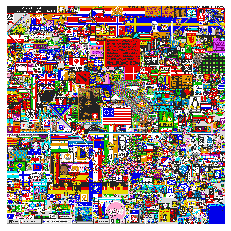

In [14]:
draw_canvas(data, "regions_sign_emb.svg")

In [1]:
from node2vec.model import Node2Vec

ModuleNotFoundError: No module named 'node2vec.model'

In [7]:
G_act, user_index = compute_user_activity_graph(G_ups, ups, final=False, color=True)

In [9]:
nx.write_gpickle(G_act, "g_act.gpickle")

In [10]:
pfile = open('user_index.pkl', 'wb')
pickle.dump(user_index, pfile)
pfile.close()

In [11]:
pfile = open('user_index.pkl', 'rb')
user_index = pickle.load(pfile)
pfile.close()

In [12]:
pfile = open('node2vec_emb.pkl', 'rb')
node2vec_emb = pickle.load(pfile)
pfile.close()

In [13]:
node2vec_emb

array([[-0.20182177,  0.2809635 , -0.46136066, ...,  0.1101304 ,
        -0.13203426, -0.19255146],
       [ 0.08575326,  0.0950909 ,  0.06569136, ...,  0.1450352 ,
        -0.3348981 , -0.40745428],
       [ 0.02631115,  0.04193163, -0.12978785, ..., -0.12735203,
        -0.00663483,  0.0440614 ],
       ...,
       [ 0.2794329 , -0.18804055,  0.44765446, ..., -0.41044518,
        -0.26570687, -0.57044905],
       [-0.02278217,  0.24676797,  0.06830547, ..., -0.30813044,
        -0.31498206, -0.10973657],
       [-0.1842156 ,  0.30379865,  0.27703053, ...,  0.31966287,
        -0.39907348, -0.5989203 ]], dtype=float32)

In [16]:
users_final = []
users_dict = {}
j = 0
for i in range(len(ups)):
    up = ups[i]
    if up[6] == 1 and up[1] not in users_dict and up[1] in user_index:
        users_final.append(up[1])
        users_dict[up[1]] = j
        j = j + 1

In [ ]:
emb_sign_final = np.zeros((len(users_final), emb_sign.shape[1]))


In [24]:
G_act, user_index = compute_user_activity_graph(G_ups, ups, final=False, color=True)

KeyboardInterrupt: 

In [18]:
pfile = open('user_index_2.pkl', 'wb')
pickle.dump(user_index, pfile)
pfile.close()

In [23]:
nx.write_gpickle(G_act, "g_act_2.gpickle")

In [26]:
pfile = open('user_index.pkl', 'rb')
user_index = pickle.load(pfile)
pfile.close()

pfile = open('g_act.gpickle', 'rb')
G_act = pickle.load(pfile)
pfile.close()

In [27]:
nx.write_weighted_edgelist(G_act, "g_act.edgelist")